### In general everything looks really good. You will see where I used built in functions to do what you did manually. 
### Your way is great for knowledge but of course, I am lazy so I use the built in functions.  As for your error with 
### scaling, you were scaling your dependent variable and that was causing problems.  

In [55]:
import pandas as pd
import random
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

#set the random seed as zero
np.random.seed(0)

In [56]:
#input data 
creditData=pd.read_csv('Modified Dataset.csv', header=0)

In [57]:
#subset macro-economic data
limit_bal=creditData.iloc[:,1]
sex=creditData.iloc[:,2]
education=creditData.iloc[:,3]
marriage=creditData.iloc[:,4]
age=creditData.iloc[:,5]
pay_0=creditData.iloc[:,6]
pay_2=creditData.iloc[:,7]
pay_3=creditData.iloc[:,8]
pay_4=creditData.iloc[:,9]
pay_5=creditData.iloc[:,10]
pay_6=creditData.iloc[:,11]
bill_amt1=creditData.iloc[:,12]
bill_amt2=creditData.iloc[:,13]
bill_amt3=creditData.iloc[:,14]
bill_amt4=creditData.iloc[:,15]
bill_amt5=creditData.iloc[:,16]
bill_amt6=creditData.iloc[:,17]
pay_amt1=creditData.iloc[:,18]
pay_amt2=creditData.iloc[:,19]
pay_amt3=creditData.iloc[:,20]
pay_amt4=creditData.iloc[:,21]
pay_amt5=creditData.iloc[:,22]
pay_amt6=creditData.iloc[:,23]
interest_rate=creditData.iloc[:,24]
employed_persons=creditData.iloc[:,25]
cpi=creditData.iloc[:,26]
consumer_confidence=creditData.iloc[:,27]
default_next_month=creditData.iloc[:,28]


In [58]:
# randomly pick the monthly datas to each cells for economic datas

for index,rowValue in interest_rate.iteritems():
        interest_rate[index]=random.choice([1.88,2,2.13])

for index,rowValue in employed_persons.iteritems():
        employed_persons[index]=random.choice([9916,9929,9931,9933,9949,9969])
        
for index,rowValue in cpi.iteritems():
        cpi[index]=random.choice([92.02,92.53,92.82,93.9,94.6,94.73])

for index,rowValue in consumer_confidence.iteritems():
        consumer_confidence[index]=random.choice([73.15,73.06,74.79,73.15,73.38,71.42])


In [59]:
#Data Exploration
default_next_month.value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

In [60]:
creditData.rename(columns={'default payment next month':'Default_Next_Month'},inplace=True)

In [63]:
creditData.groupby('Default_Next_Month').mean()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Interest_Rate,Employed_Persons,CPI,Consumer_Confidence
Default_Next_Month,,,,,,,,,,,,,,,,,,,,,
0,15064.893982,178099.726074,1.614150,1.841337,1.558637,35.417266,-0.211222,-0.301917,-0.316256,-0.355633,...,6307.337357,6640.465074,5753.496833,5300.529319,5248.220296,5719.371769,1.664955,9937.858457,92.840481,72.829695
1,14773.781947,130109.656420,1.567058,1.894665,1.528029,35.725738,0.668174,0.458258,0.362116,0.254521,...,3397.044153,3388.649638,3367.351567,3155.626733,3219.139542,3441.482068,1.664105,9937.694846,92.839361,72.825799


In [64]:
creditData.groupby('SEX').mean()

,ID,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Interest_Rate,Employed_Persons,CPI,Consumer_Confidence,Default_Next_Month
SEX,,,,,,,,,,,,,,,,,,,,,
1,14802.770104,163519.825034,1.839250,1.572090,36.519431,0.063257,-0.029189,-0.068557,-0.133832,-0.189182,...,5960.720138,5412.506057,4869.177995,4830.827052,5276.196753,1.669919,9937.804509,92.838156,72.831090,0.241672
2,15130.282078,170086.462014,1.862246,1.538593,34.806868,-0.069181,-0.202407,-0.230289,-0.277661,-0.316751,...,5895.200088,5103.057255,4797.786992,4778.752043,5175.665305,1.661385,9937.833922,92.841597,72.827352,0.207763


In [65]:
creditData.groupby('MARRIAGE').mean()

,ID,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Interest_Rate,Employed_Persons,CPI,Consumer_Confidence,Default_Next_Month
MARRIAGE,,,,,,,,,,,,,,,,,,,,,
0,15755.796296,132962.962963,1.740741,2.740741,37.814815,-0.166667,-0.203704,-0.203704,-0.370370,-0.407407,...,2781.944444,4027.944444,2864.222222,2124.518519,2238.388889,1.685185,9932.037037,93.074074,72.925926,0.092593
1,15253.288821,182200.893184,1.620031,1.985138,40.016692,-0.036752,-0.163262,-0.206238,-0.259243,-0.308441,...,6205.714401,5328.491983,5075.922469,4836.070503,5331.664836,1.664104,9937.913098,92.844937,72.826708,0.234717
2,14807.277813,156413.660737,1.589514,1.729454,31.452706,-0.002819,-0.111000,-0.135680,-0.191118,-0.232085,...,5648.984465,5123.063518,4612.971185,4781.813581,5162.734340,1.665435,9937.774242,92.834252,72.829742,0.209283
3,13734.154799,98080.495356,1.594427,2.235294,42.798762,0.170279,0.000000,0.024768,-0.024768,-0.142415,...,7865.136223,6150.086687,5121.179567,4563.919505,3408.987616,1.656347,9937.321981,92.897833,72.857585,0.260062


In [66]:
creditData.groupby('Interest_Rate').mean()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Employed_Persons,CPI,Consumer_Confidence,Default_Next_Month
Interest_Rate,,,,,,,,,,,,,,,,,,,,,
1,14948.814060,166711.345332,1.609824,1.862384,1.551457,35.410262,-0.002585,-0.138908,-0.158497,-0.204733,...,5701.097942,5868.929701,5400.416426,4942.199065,4789.886050,5136.181565,9937.858009,92.839117,72.828677,0.221637
2,15026.564559,167874.125257,1.600662,1.848468,1.552073,35.523442,-0.023818,-0.131174,-0.170085,-0.228702,...,5644.660934,5947.504337,5137.564910,4767.517926,4804.179161,5255.503134,9937.804242,92.840796,72.828912,0.220980


In [67]:
creditData.groupby('Employed_Persons').mean()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Interest_Rate,CPI,Consumer_Confidence,Default_Next_Month
Employed_Persons,,,,,,,,,,,,,,,,,,,,,
9916,14970.425719,167009.984026,1.601038,1.866414,1.563099,35.507788,-0.007188,-0.125399,-0.163339,-0.217053,...,5660.252596,5763.262580,4963.926917,4868.639377,4635.562700,4884.821685,1.657149,92.852037,72.844249,0.220647
9929,15055.923617,170135.525261,1.599840,1.855654,1.555934,35.388933,0.007017,-0.120890,-0.155573,-0.212711,...,5629.869086,5955.132518,5614.270449,4720.310746,4881.887731,5695.076784,1.674018,92.854651,72.822574,0.224338
9931,15136.239069,168334.873646,1.604693,1.849378,1.543522,35.626153,-0.022864,-0.129964,-0.180505,-0.225030,...,5808.602888,6219.561171,5374.124348,5026.193943,5016.321300,5377.512034,1.665263,92.802046,72.829924,0.228239
9933,15044.767960,166083.582090,1.607960,1.847363,1.547463,35.379900,-0.020100,-0.137313,-0.169552,-0.218507,...,5339.030647,5873.161592,5382.356617,4705.323781,4719.771343,5142.106866,1.673234,92.835025,72.824080,0.219303
9949,14995.094181,168646.270746,1.607079,1.844431,1.545491,35.409518,-0.046791,-0.154369,-0.169366,-0.240352,...,6061.016197,6252.398520,5276.448310,4985.587283,4745.282144,5248.419516,1.653869,92.863827,72.829234,0.214957
9969,14800.570513,164707.532051,1.601763,1.855569,1.555689,35.601562,-0.010216,-0.134615,-0.158854,-0.210337,...,5484.298478,5464.076723,4743.163862,4650.936098,4798.976362,4947.143229,1.665064,92.833734,72.822917,0.219752


In [68]:
creditData.groupby('CPI').mean()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Interest_Rate,Employed_Persons,Consumer_Confidence,Default_Next_Month
CPI,,,,,,,,,,,,,,,,,,,,,
92,14983.572515,167138.569217,1.601992,1.851403,1.556969,35.383606,-0.008816,-0.130561,-0.170671,-0.214887,...,5624.209233,5899.703143,5171.821388,4884.484420,4688.262602,5036.944680,1.662696,9937.743522,72.833030,0.220540
93,14980.504631,170191.133005,1.609064,1.847291,1.535961,35.745616,-0.035665,-0.155862,-0.158030,-0.224236,...,5780.472906,5847.830739,5275.650640,4857.413202,5039.158227,5506.630542,1.674680,9938.321182,72.839212,0.226207
94,15035.568746,166630.009934,1.603616,1.858633,1.552354,35.504769,-0.018776,-0.127359,-0.163719,-0.227399,...,5662.764753,5989.814723,5279.994437,4724.059209,4842.539936,5332.303398,1.662825,9937.686966,72.817405,0.219650


In [69]:
creditData.groupby('Consumer_Confidence').mean()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Interest_Rate,Employed_Persons,CPI,Default_Next_Month
Consumer_Confidence,,,,,,,,,,,,,,,,,,,,,
71,14960.831387,166973.615674,1.605185,1.844251,1.550564,35.464081,-0.009895,-0.128043,-0.165446,-0.211162,...,5589.426084,5922.552741,5185.186028,4601.013655,4629.626163,5449.267366,1.665545,9937.832971,92.849990,0.222442
73,15025.716310,168109.331197,1.603975,1.855977,1.551462,35.522928,-0.021476,-0.134561,-0.166650,-0.222517,...,5761.396426,5909.537645,5185.885362,4946.046105,4780.730877,5293.314077,1.664097,9937.925761,92.841710,0.221266
74,14939.491048,165491.852746,1.601287,1.850734,1.554818,35.356870,-0.004426,-0.136391,-0.165158,-0.222893,...,5345.884128,5966.469926,5426.766043,4572.755381,5046.921746,4665.195534,1.666667,9937.395494,92.824381,0.219674


In [70]:
creditData['x_bin']=pd.cut(x=creditData.AGE, bins=[20,30,40,50,60,70]) 

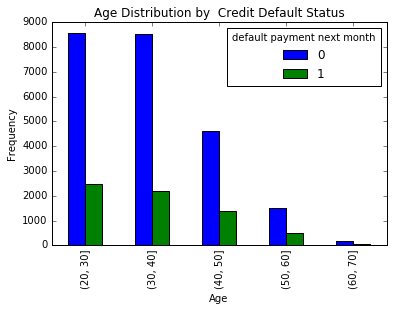

In [71]:
%matplotlib inline
#bar chart of age grouped by default
pd.crosstab(creditData.x_bin,default_next_month).plot(kind='bar')
plt.title('Age Distribution by  Credit Default Status')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [72]:
#Separate the dataset into dependent and independent variables
X=creditData.drop('Default_Next_Month',axis=1)
X=X.drop('ID',axis=1)
X=X.drop('x_bin',axis=1) 
y=creditData['Default_Next_Month']

#then seperate it into training set, validation set and test set
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.15)
 

In [74]:
#######MODEL ONE: LOGISTIC REGRESSION MODEL######
LR_classifier = LogisticRegression()
LR_classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## begin added  code - Jeremy

In [75]:
#these lines suppress the pink columns warnings

import warnings
warnings.filterwarnings('ignore')

### I used this code snippet for each of your types of models.  We just create an estimator and let cross_val_score
### do all the work.

In [76]:
LR_classifier_jeremy = LogisticRegression()
# LR_classifier.fit(X_train,y_train)
scores = cross_val_score(LR_classifier_jeremy,X,y,cv=10, n_jobs=-1,scoring='accuracy')
print("LR Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

LR Accuracy: 0.78 (+/- 0.00)


## end Jeremy code

In [22]:
#10-fold cross-validation,if the evaluation score suggests not overfitting, predict the default status for each sample in test set
LR_cross_val_scores = cross_val_score(LR_classifier,X_test,y_test,scoring='accuracy',cv=10)
print("The 10 fold cross validation score based on Logistic Regression Model is: ",'%.3f'%LR_cross_val_scores.mean())

if LR_cross_val_scores.mean() >0.97:
    print (" The Logistic Regression Model is overfitting in this case.")
else:
    LR_predicted=LR_classifier.predict(X_test)
    #generate default probabilities based on test set
    LR_prob_default=np.sum(LR_predicted)/len(LR_predicted)
    print("The Default Probability based on Logistic Regression Model is :",'%.3f'%LR_prob_default)
    LR_accuracy=LR_classifier.score(X_test,y_test)
    print("The accuracy of Logistic Regression Model on test set is : ",'%.3f'%LR_accuracy)
    print(metrics.confusion_matrix(y_test,LR_predicted))
    print (metrics.classification_report(y_test,LR_predicted))
    

The 10 fold cross validation score based on Logistic Regression Model is:  0.784
The Default Probability based on Logistic Regression Model is : 0.000
The accuracy of Logistic Regression Model on test set is :  0.784
[[3529    0]
 [ 971    0]]
             precision    recall  f1-score   support

          0       0.78      1.00      0.88      3529
          1       0.00      0.00      0.00       971

avg / total       0.62      0.78      0.69      4500



In [25]:
#create a dataframe to store evaluation info of different models
evaluation = pd.DataFrame({'Model':['Logistic Regression'],'Default_Probability':[LR_prob_default],'Cross_Validation_Accuracy':[LR_cross_val_scores.mean()],'Test_Accuracy':[LR_accuracy]})
evaluation=evaluation[['Model','Default_Probability','Cross_Validation_Accuracy','Test_Accuracy']]
print(evaluation)

                 Model  Default_Probability  Cross_Validation_Accuracy  \
0  Logistic Regression                  0.0                      0.784   

   Test_Accuracy  
0       0.784222  


In [26]:
#########MODEL TWO: RANDOM FOREST MODEL#########
RF_classifier = RandomForestClassifier(random_state=0)

## begin added  code - Jeremy

In [27]:
RF_classifier_jeremy = RandomForestClassifier(random_state=0)
scores = cross_val_score(RF_classifier_jeremy,X,y,cv=10, n_jobs=-1,scoring='accuracy')
print("RF Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

RF Accuracy: 0.81 (+/- 0.02)


## end Jeremy code

In [28]:
# 10 Fold Cross Validation over the entire training set
kf=KFold(n_splits=10,shuffle=False)
RF_cross_val_score=0
for train_index, test_index in kf.split(X_train):
    X_train_subset, X_test_subset=X_train.iloc[train_index],X_train.iloc[test_index]
    y_train_subset, y_test_subset=y_train.iloc[train_index],y_train.iloc[test_index]
    RF_classifier.fit(X_train_subset,y_train_subset)
    RF_cross_val_score=RF_cross_val_score+RF_classifier.score(X_test_subset,y_test_subset)
RF_cross_val_score=RF_cross_val_score/10
print("The 10 fold cross validation score based on Naive Bayes Model(Non Scaled) is: ",'%.3f'%RF_cross_val_score)

The 10 fold cross validation score based on Naive Bayes Model(Non Scaled) is:  0.805


In [29]:
# if the score is less than 0.975, then build the classifier with the entire training set
if RF_cross_val_score >0.97:
    print (" The Random Forest Model is overfitting in this case.")
else:
    RF_classifier.fit(X_train,y_train)
    RF_predicted=RF_classifier.predict(X_test)
    RF_prob_default=np.sum(RF_predicted)/len(RF_predicted)
    print("The Default Probability based on Random Forest Model is :",'%.3f'%RF_prob_default)
    RF_accuracy=RF_classifier.score(X_test,y_test)
    print("The accuracy of Random Forest Model on test set is : ",'%.3f'%RF_accuracy)
    print(metrics.confusion_matrix(y_test,RF_predicted))
    print(metrics.classification_report(y_test,RF_predicted))

The Default Probability based on Random Forest Model is : 0.107
The accuracy of Random Forest Model on test set is :  0.814
[[3354  175]
 [ 663  308]]
             precision    recall  f1-score   support

          0       0.83      0.95      0.89      3529
          1       0.64      0.32      0.42       971

avg / total       0.79      0.81      0.79      4500



In [30]:
features_weight=RF_classifier.fit(X_test,y_test).feature_importances_
feature_index = np.where(features_weight==max(features_weight))
feature_index=int(feature_index[0][0])
print("The most important feature is:",(list(X_test)[feature_index]))

The most important feature is: PAY_0


In [31]:
#output the result into the existing evaluation dataframe to compare with other model
new_evaluation=pd.DataFrame({'Model':["Random Forest"],'Default_Probability':[RF_prob_default],'Cross_Validation_Accuracy':[RF_cross_val_score],'Test_Accuracy':[RF_accuracy]})
evaluation = evaluation.append(new_evaluation)
evaluation=evaluation[['Model','Default_Probability','Cross_Validation_Accuracy','Test_Accuracy']]
print(evaluation)

                 Model  Default_Probability  Cross_Validation_Accuracy  \
0  Logistic Regression             0.000000                    0.78400   
0        Random Forest             0.107333                    0.80549   

   Test_Accuracy  
0       0.784222  
0       0.813778  


## begin added  code - Jeremy

In [32]:
NB_classifier_jeremy=GaussianNB()
scores = cross_val_score(NB_classifier_jeremy,X,y,cv=10, n_jobs=-1,scoring='accuracy')
print("NB Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

NB Accuracy: 0.38 (+/- 0.03)


## end Jeremy code

In [42]:
########MODEL THREE: NAIVE BAYES #######################
### Non Scaled ####
#10-fold cross validation for the entire standardized training data without scaling/normalization/standarization
NB_classifier=GaussianNB()
kf=KFold(n_splits=10,shuffle=False)
NB_cross_val_score=0
for train_index, test_index in kf.split(X_train):
    X_train_subset, X_test_subset=X_train.iloc[train_index],X_train.iloc[test_index]
    y_train_subset, y_test_subset=y_train.iloc[train_index],y_train.iloc[test_index]
    NB_classifier.fit(X_train_subset,y_train_subset)
    NB_cross_val_score=NB_cross_val_score+NB_classifier.score(X_test_subset,y_test_subset)
    
NB_cross_val_score=NB_cross_val_score/10
print("The 10 fold cross validation score based on Naive Bayes Model is: ",'%.3f'%NB_cross_val_score)

The 10 fold cross validation score based on Naive Bayes Model is:  0.378


In [43]:
if NB_cross_val_score >0.97:
    print ("The Naive Bayes Model is overfitting in this case.")
else:
    NB_classifier.fit(X_train,y_train)
    NB_predicted=NB_classifier.predict(X_test)
    NB_prob_default=np.sum(NB_predicted)/len(NB_predicted)
    print("The Default Probability based on Naive Bayes Model is :",'%.3f'%NB_prob_default)
    NB_accuracy=NB_classifier.score(X_test,y_test)
    print("The accuracy of Naive Bayes Model on test set is : ",'%.3f'%NB_accuracy)

The Default Probability based on Naive Bayes Model is : 0.805
The accuracy of Naive Bayes Model on test set is :  0.368


In [44]:
#output the result into the existing evaluation dataframe to compare with other models
new_evaluation=pd.DataFrame({'Model':["Naive Bayes_NonScaled"],'Default_Probability':[NB_prob_default],'Cross_Validation_Accuracy':[NB_cross_val_score],'Test_Accuracy':[NB_accuracy]})
evaluation = evaluation.append(new_evaluation)
evaluation=evaluation[['Model','Default_Probability','Cross_Validation_Accuracy','Test_Accuracy']]
print(evaluation)

                   Model  Default_Probability  Cross_Validation_Accuracy  \
0    Logistic Regression             0.000000                   0.784000   
0          Random Forest             0.107333                   0.805490   
0  Naive Bayes_NonScaled             0.804667                   0.378078   
0  Naive Bayes_NonScaled             0.804667                   0.378078   

   Test_Accuracy  
0       0.784222  
0       0.813778  
0       0.367556  
0       0.367556  


## begin added  code - Jeremy

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
NB_classifier_jeremy_scaled=GaussianNB()
X_scaled = scaler.fit_transform(X)
scores = cross_val_score(NB_classifier_jeremy_scaled,X_scaled,y,cv=10, n_jobs=-1,scoring='accuracy')
print("NB Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


NB Accuracy: 0.71 (+/- 0.06)


## end Jeremy code

### The reason you were getting the label error is that you were scaling the y variable.  You don't need to do that.  You can see how much of a difference scaling made

In [52]:
#10-fold cross validation for the entire standardized training set
NB_cross_val_score_scaled=0
for NBtrain_index, NBtest_index in kf.split(X_train):
    X_train_subset, X_test_subset=X_train.iloc[NBtrain_index],X_train.iloc[NBtest_index]
    y_train_subset, y_test_subset=y_train.iloc[NBtrain_index],y_train.iloc[NBtest_index]
    #standardization
    X_train_scaled_subset=(X_train_subset-X_train_subset.mean())/X_train_subset.std()
    y_train_scaled_subset=(y_train_subset-y_train_subset.mean())/y_train_subset.std()
    X_test_scaled_subset=(X_test_subset-X_test_subset.mean())/X_test_subset.std()
    y_test_scaled_subset=(y_test_subset-y_test_subset.mean())/y_test_subset.std()
    # turn the dataframe subset, which is 2D array into 1D array
#     y_train_scaled_subset=np.asarray(y_train_scaled_subset,dtype="|S6")
#     y_test_scaled_subset=np.asarray(y_test_scaled_subset,dtype="|S6")
    NB_classifier.fit(X_train_scaled_subset,y_train_subset)
    NB_predicted_subset=NB_classifier.predict(X_test_scaled_subset)
    print("####################################")
    NB_cross_val_score_scaled=NB_cross_val_score_scaled+NB_classifier.score(X_test_scaled_subset,y_test_subset)

    NB_cross_val_score_scaled=NB_cross_val_score_scaled/10
print("The 10 fold cross validation score based on Naive Bayes Model(Scaled) is: ",'%.3f'%NB_cross_val_score_scaled)

####################################
####################################
####################################
####################################
####################################
####################################
####################################
####################################
####################################
####################################
The 10 fold cross validation score based on Naive Bayes Model(Scaled) is:  0.079


In [ ]:
if NB_cross_val_score >0.97:
    print (" The Naive Bayes Model (scaled) is overfitting in this case.")
else:
    #standardization
    X_train_scaled=(X_train-X_train.mean())/X_train.std()
    y_train_scaled=(y_train-y_train.mean())/y_train.std()
    X_test_scaled=(X_test-X_test.mean())/X_test.std()
    y_test_scaled=(y_test-y_test.mean())/y_test.std()
    # turn the dataframe subset, which is 2D array into 1D array
    y_train_scaled=np.asarray(y_train_scaled,dtype="|S6")
    y_test_scaled=np.asarray(y_test_scaled,dtype="|S6") 
    NB_classifier.fit(X_train_scaled,y_train_scaled)
    NB_predicted_scaled=NB_classifier.predict(X_test_scaled)
    NB_predicted_default=pd.value_counts(pd.Series(NB_predicted_scaled))[1]
    NB_predicted_nondefault=pd.value_counts(pd.Series(NB_predicted_scaled))[0] 
    NB_prob_default_scaled=NB_predicted_default/(NB_predicted_default+NB_predicted_nondefault)
    print("The Default Probability based on Naive Bayes Model is :",'%.3f'%NB_prob_default_scaled)
    #print(pd.value_counts(pd.Series(NB_predicted_scaled)))
    #print(y_test_scaled.)
    #print(accuracy_score(y_test_scaled,NB_predicted_scaled))
    NB_accuracy=NB_classifier.score(X_test_scaled,y_test_scaled)
    print("The accuracy of Naive Bayes Model on test set is : ",'%.3f'%NB_accuracy)

In [ ]:
#output the result into the existing evaluation dataframe to compare with other models
#new_evaluation=pd.DataFrame({'Model':["Naive Bayes"],'Default_Probability':[NB_prob_default],'Cross_Validation_Accuracy':[NB_cross_val_score],'Test_Accuracy':[NB_accuracy]})
#evaluation = evaluation.append(new_evaluation)
#evaluation=evaluation[['Model','Default_Probability','Cross_Validation_Accuracy','Test_Accuracy']]
#print(evaluation)